In [118]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [119]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [120]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [121]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Create a StandardScaler instance
scaler = StandardScaler()

In [122]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
# market_data_scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=crypto_names)
coinid = market_data_df.index
# Display sample data
display(market_data_df.head(10))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


### Find the Best Value for k Using the Original Scaled DataFrame.

In [123]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(market_data_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

c:\Users\gabri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gabri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gabri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gabri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.658120e+05
5,6,3.431060e+05
6,7,1.998921e+05
7,8,1.751659e+05
8,9,1.303853e+05
9,10,1.057068e+05


In [146]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df = pd.DataFrame({
    'k': list(k_values),
    'inertia': []
})

   # Create the line plot
elbow_plot = elbow_df.plot(
    x='k', 
    y='inertia',
    title='Elbow Method for Optimal k',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    marker='o',
    grid=True,
    figsize=(1, 11),
    ignore_index=True
)


ValueError: All arrays must be of the same length

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [125]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [126]:
# Fit the K-Means model using the scaled data
model.fit(market_data_df)

c:\Users\gabri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [127]:
# Predict the clusters to group the cryptocurrencies using the scaled data
# Add a new column to the DataFrame with the predicted clusters
market_data_df["class"] = model.predict(market_data_df)

# View the resulting array of cluster values.
market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [128]:
# Create a copy of the DataFrame
clustered_df = market_data_df.copy()

In [129]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = model.labels_

# Display sample data
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


<Axes: title={'center': 'Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

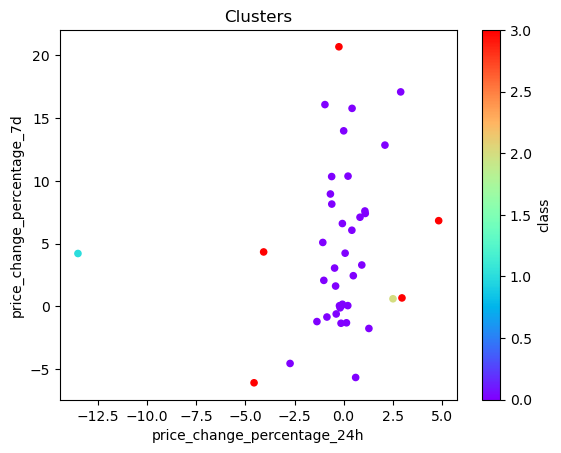

In [130]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="class", colormap="rainbow", title="Clusters")

### Optimize Clusters with Principal Component Analysis.

In [131]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [132]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_df)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-341.80105032,  -51.36778461,   12.52676936],
       [-249.42055461,   24.11598987,  -14.22523936],
       [-402.6148083 , -118.7112562 ,   24.83576373],
       [-406.7525238 ,  -79.48803706,    1.56693161],
       [-382.43003559, -103.43259108,   16.75214897]])

In [133]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [144]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pcs_df = pd.DataFrame(
    data=market_data_pca, columns=["PC 1", "PC 2", "PC 3"], index=crypto_names
)
# Creating a DataFrame with the PCA data
pcs_df.head()
# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=crypto_names, ignore_index=True)

# Display sample data
market_data_df.head()

market_data_scaled_df = pd.DataFrame(
    scaled_data, 
    columns=market_data_df.columns, 
    ignore_index=True(


SyntaxError: incomplete input (957306893.py, line 20)

### Find the Best Value for k Using the PCA Data

In [135]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pcs_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
intertia_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
intertia_df = pd.DataFrame(intertia_data)

# Display the DataFrame
intertia_df

c:\Users\gabri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gabri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gabri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gabri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


In [136]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
intertia_df.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k_values)

ValueError: ClassSelector parameter 'ElementPlot.xticks' value must be an instance of (int, list, tuple, ndarray, Ticker), not range(1, 11).

:Curve   [k]   (inertia)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [137]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [138]:
# Fit the K-Means model using the PCA data
model.fit(pcs_df)

c:\Users\gabri\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [139]:
# Predict the clusters to group the cryptocurrencies using the PCA data
# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = model.predict(pcs_df)

# Print the resulting array of cluster values.
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [140]:
# Create a copy of the DataFrame with the PCA data
clustered_df = pcs_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = model.labels_

# Display sample data
clustered_df.head()

,PC 1,PC 2,PC 3,class
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [141]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Use "class" for the color to better visualize the data.
clustered_df.hvplot.scatter(x="PC 1", y="PC 2", by="class", title="Clusters")

:NdOverlay   [class]
   :Scatter   [PC 1]   (PC 2)

### Determine the Weights of Each Feature on each Principal Component

In [143]:
# Use the columns from the original scaled DataFrame as the index.
pcs_df = pd.DataFrame(
    data=market_data_pca, columns=["PC 1", "PC 2", "PC 3"], index=crypto_names
)
pcs_df.head()

,PC 1,PC 2,PC 3
coin_id,,,
bitcoin,-341.801050,-51.367785,12.526769
ethereum,-249.420555,24.115990,-14.225239
tether,-402.614808,-118.711256,24.835764
ripple,-406.752524,-79.488037,1.566932
bitcoin-cash,-382.430036,-103.432591,16.752149


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    